In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.metrics import mean_squared_error

In [4]:
GOOGL = pd.read_csv('GOOGL.csv')

### Model 2. Moving Average
Moving Average is a very simple model for Time Series modelling.

$MA = \frac{A_1 + A_2 + \cdots + A_n}{n}$

where:

$A = $ Average in period $n$

$n = $ Number of time periods 

In [5]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

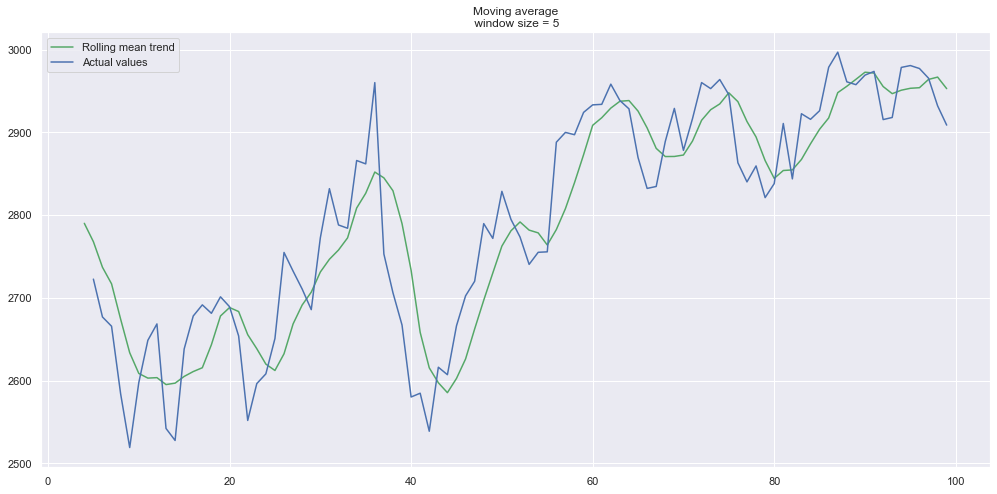

In [6]:
#Smooth by the previous 5 days (by week)
plot_moving_average(GOOGL['4. close'], 5)

In [8]:
mean_squared_error(
    GOOGL['4. close'].rolling(window=5).mean()[-10:], 
    GOOGL[-10:])

ValueError: could not convert string to float: '2021-11-15'

In [ ]:
#Smooth by the previous month (30 days)
plot_moving_average(GOOGL['4. close'], 30)

In [ ]:
mean_squared_error(
    GOOGL['4. close'].rolling(window=30).mean(), 
    GOOGL[-10:])

In [ ]:
#Smooth by previous quarter (90 days)
plot_moving_average(GOOGL['4. close'], 90, plot_intervals=True)

In [ ]:
mean_squared_error(
    GOOGL['4. close'].rolling(window=90).mean(), 
    GOOGL[-10:])

### Model 3. Exponential Smoothing

$y = \alpha x_t + (1 - \alpha)y_{t-1}, t > 0$

In [ ]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

In [ ]:
plot_exponential_smoothing(GOOGL['4. close'], [0.05, 0.3])

In [ ]:
mean_squared_error(
    exponential_smoothing(GOOGL['4. close'], [0.05, 0.3]), 
    GOOGL[-10:])

### Model 4. Double Exponential Smoothing

Double Exponential Smoothing is used when there is a trend in the time series. In that case, . 

$y = \alpha x_t + (1 - \alpha)(y_{t-1} + b_{t-1})$

$b_t = \beta (y_t - y_{t-1}) + (1 - \beta)b_{t-1}$

In [ ]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result



In [ ]:
def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

In [ ]:
plot_double_exponential_smoothing(GOOGL['4. close'], alphas=[0.9, 0.02], betas=[0.9, 0.02])

In [ ]:
mean_squared_error(, GOOGL[-10:])